In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# constants
LEFT, RIGHT = -1, 1
START = 2
EPISODES = 100
RUNS = 100
V_TRUE = np.arange(1, 6) / 6.0

In [67]:
# mrp implementation
class MRP:
    def __init__(self):
        self.reset()

    def reset(self):
        self.state = START
        return self.state

    def step(self):
        if np.random.rand() < 0.5:
            self.state += LEFT
        else:
            self.state += RIGHT
        
        if self.state == -1:
            return self.state, 0.0, True
        elif self.state == 5:
            return self.state, 1.0, True
        else:
            return self.state, 0.0, False

In [68]:
# temporal difference implementation
def td(mrp, values, alpha=0.1):
    state = mrp.reset()
    terminal = False
    while True:
        new_state, reward, terminal = mrp.step()
        if terminal: 
            values[state] += alpha * (reward + 0 - values[state])
            break
        else: 
            values[state] += alpha * (reward + values[new_state] - values[state])
            state = new_state
    return values


In [69]:
# monte carlo implementation
def mc(mrp, values, alpha=0.1):
    state = mrp.reset()
    trajectory = [state]
    terminal = False
    while True:
        trajectory.append(state)
        state, reward, terminal = mrp.step()
        if terminal: break
    for s in trajectory:
        values[s] += alpha * (reward - values[s])
    return values
    


In [70]:
# generate data for left figure
mrp = MRP()
values = np.full(5, 0.5)
value_data = {0: np.copy(values)}
for i in range(EPISODES):
    values = td(mrp, values)
    if i+1 in {1, 10, 100}:
        value_data[i+1] = np.copy(values)

In [71]:
# generate td data for right figure
mrp = MRP()
td_error_data = dict()
for alpha in [0.05, 0.1, 0.15]:
    total_errors = np.zeros(EPISODES)
    for run in range(RUNS):
        errors = []
        values = np.full(5, 0.5)
        for i in range(EPISODES):
            values = td(mrp, values, alpha)
            errors.append(np.sqrt(np.sum(np.power(V_TRUE - values, 2)) / 5.0))
        total_errors += np.asarray(errors)
    total_errors /= RUNS
    td_error_data[alpha] = total_errors


In [72]:
# generate mc data for right figure
mrp = MRP()
mc_error_data = dict()
for alpha in [0.01, 0.02, 0.03, 0.04]:
    total_errors = np.zeros(EPISODES)
    for run in range(RUNS):
        errors = []
        values = np.full(5, 0.5)
        for i in range(EPISODES):
            values = mc(mrp, values, alpha)
            errors.append(np.sqrt(np.sum(np.power(V_TRUE - values, 2)) / 5.0))
        total_errors += np.asarray(errors)
    total_errors /= RUNS
    mc_error_data[alpha] = total_errors


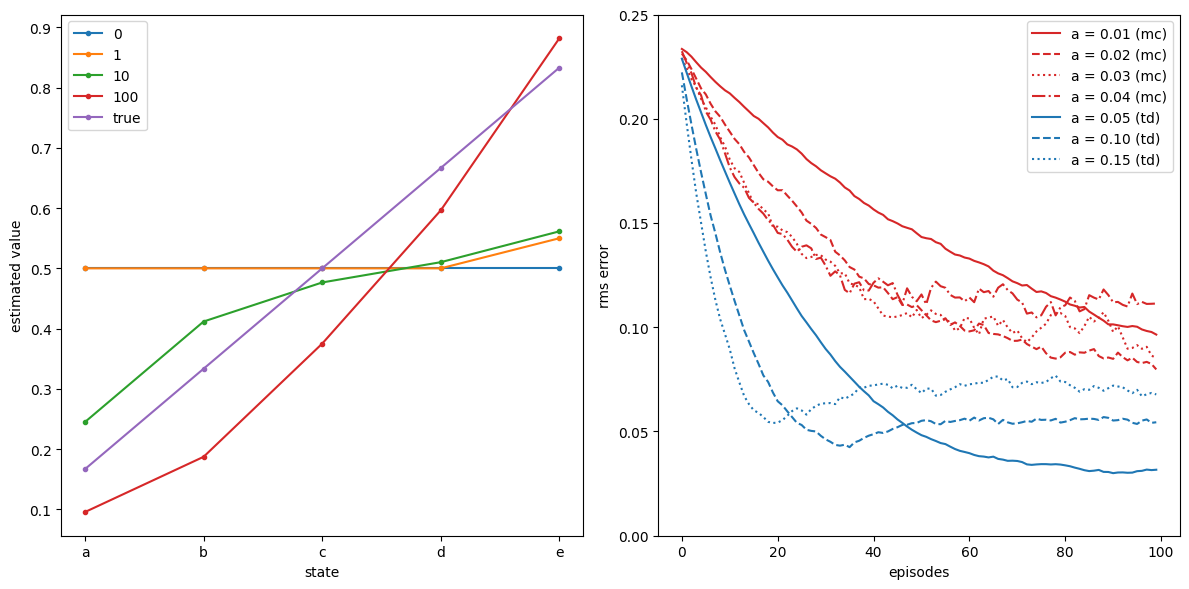

In [76]:
# generate figure
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for ep in value_data:
    plt.plot(('a', 'b', 'c', 'd', 'e'), value_data[ep], label=ep, marker='.')
plt.plot(('a', 'b', 'c', 'd', 'e'), V_TRUE, label='true', marker='.')
plt.xlabel('state')
plt.ylabel('estimated value')
plt.legend()

ax = plt.subplot(1, 2, 2)
for alpha, linestyle in zip(mc_error_data, ['-','--',':','-.']):
    plt.plot(mc_error_data[alpha], linestyle=linestyle, color='tab:red', label='a = %0.2f (mc)' % np.round(alpha, 2))
for alpha, linestyle in zip(td_error_data, ['-','--',':']):
    plt.plot(td_error_data[alpha], linestyle=linestyle, color='tab:blue', label='a = %0.2f (td)' % np.round(alpha, 2))
plt.xlabel('episodes')
plt.ylabel('rms error')
plt.ylim(0, 0.25)
plt.legend()

plt.tight_layout()
plt.show()
